In [1]:
import pandas as pd
import numpy as np

In [2]:
pCTR_val = pd.read_csv('LR_pCTR_val_ceLiu.csv',index_col=0)
pCTR_test = pd.read_csv('LR_pCTR_test_ceLiu.csv',index_col=0)
click_val = pd.read_csv('LR_standard_val_ceLiu.csv',index_col=0)
payprice_val = pd.read_csv('LR_payprice_val_ceLiu.csv',index_col=0)

In [99]:
pCTR_val.mean()

0.00088126926688950969

In [100]:
pCTR_test.mean()

0.00090022758818608661

In [3]:
bidid_test = pd.read_csv('LR_bidid_test_ceLiu.csv',index_col=0)

In [4]:
def evaluation (pBidprice, payprice, clicks, budget=6500000):
    win_num = 0.
    total_cost = 0.
    click_num = 0.
    for i in range(0, len(payprice)):
        if pBidprice[i] > payprice[i]:
            if total_cost + payprice[i] > budget:
                break
            win_num = win_num + 1
            total_cost = total_cost + payprice[i]
            click_num += clicks[i]
    ctr = click_num / win_num
    cpc = total_cost / click_num
    print('win_num {}, total_cost {}, click_num {}, ctr {}, cpc {}'.format(win_num, total_cost, click_num, ctr, cpc))
    return win_num, total_cost, click_num, ctr, cpc


In [5]:
def pbidprice(ctr, base_bid):
    pbid = []
    for i in range(len(ctr)):
        p = base_bid * (ctr[i]/0.000738)
        pbid.append(p)

    return pbid

In [21]:
np.array(pbidprice(np.array(pCTR_val), 1))

array([[  1.44498691e-07],
       [  8.08571683e-08],
       [  5.70512268e-08],
       ..., 
       [  3.63783009e-07],
       [  6.72731821e-08],
       [  3.04173316e-07]])

In [6]:
pCTR_val = np.array(pCTR_val)
payprice_val = np.array(payprice_val)
click_val = np.array(click_val)

In [30]:
np.array(pbidprice(pCTR_val, 1))[0]

array([  1.44498691e-07])

In [32]:
np.array(payprice_val)[0]

array([23])

# Linear Bidding

In [36]:
base = 1
bidp = []
win_number = []
totalcost = []
clicknum = []
ctr_p = []
cpc_p = []

for i in range(180):
    bid_p = np.array(pbidprice(pCTR_val, base)) # the list of predicted price
    payprice = payprice_val
    clicks   = click_val
    
    # 打乱顺序
    #shuffle  = np.random.permutation(len(payprice))
    #payprice = payprice[shuffle]
    #bid_p    = bid_p[shuffle]
    #clicks   = clicks[shuffle]
    
    win_num, total_cost, click_num, ctr, cpc = evaluation(bid_p, payprice, clicks)
    #print(base)
    win_number.append(win_num)
    totalcost.append(total_cost)
    clicknum.append(click_num)
    ctr_p.append(ctr)
    cpc_p.append(cpc)
    bidp.append(bid_p)
    
    base += 1 # a new base bid price

win_num 997.0, total_cost [ 32073.], click_num [ 11.], ctr [ 0.0110331], cpc [ 2915.72727273]
win_num 2336.0, total_cost [ 68463.], click_num [ 18.], ctr [ 0.00770548], cpc [ 3803.5]
win_num 3370.0, total_cost [ 100219.], click_num [ 25.], ctr [ 0.0074184], cpc [ 4008.76]
win_num 4473.0, total_cost [ 135185.], click_num [ 30.], ctr [ 0.00670691], cpc [ 4506.16666667]
win_num 5652.0, total_cost [ 176801.], click_num [ 37.], ctr [ 0.00654636], cpc [ 4778.40540541]
win_num 7044.0, total_cost [ 226560.], click_num [ 38.], ctr [ 0.00539466], cpc [ 5962.10526316]
win_num 8382.0, total_cost [ 273829.], click_num [ 41.], ctr [ 0.00489143], cpc [ 6678.75609756]
win_num 9660.0, total_cost [ 322284.], click_num [ 44.], ctr [ 0.00455487], cpc [ 7324.63636364]
win_num 10941.0, total_cost [ 369597.], click_num [ 51.], ctr [ 0.00466137], cpc [ 7247.]
win_num 12140.0, total_cost [ 414277.], click_num [ 55.], ctr [ 0.00453048], cpc [ 7532.30909091]
win_num 13345.0, total_cost [ 459030.], click_num [ 59

win_num 99156.0, total_cost [ 4544084.], click_num [ 150.], ctr [ 0.00151277], cpc [ 30293.89333333]
win_num 100122.0, total_cost [ 4602094.], click_num [ 150.], ctr [ 0.00149817], cpc [ 30680.62666667]
win_num 101072.0, total_cost [ 4659610.], click_num [ 150.], ctr [ 0.00148409], cpc [ 31064.06666667]
win_num 102094.0, total_cost [ 4719771.], click_num [ 150.], ctr [ 0.00146923], cpc [ 31465.14]
win_num 103025.0, total_cost [ 4775658.], click_num [ 152.], ctr [ 0.00147537], cpc [ 31418.80263158]
win_num 103971.0, total_cost [ 4833389.], click_num [ 152.], ctr [ 0.00146195], cpc [ 31798.61184211]
win_num 104973.0, total_cost [ 4895677.], click_num [ 152.], ctr [ 0.00144799], cpc [ 32208.40131579]
win_num 105948.0, total_cost [ 4953422.], click_num [ 153.], ctr [ 0.0014441], cpc [ 32375.30718954]
win_num 106884.0, total_cost [ 5013602.], click_num [ 153.], ctr [ 0.00143146], cpc [ 32768.64052288]
win_num 107792.0, total_cost [ 5068865.], click_num [ 154.], ctr [ 0.00142868], cpc [ 3291

win_num 119083.0, total_cost [ 6499991.], click_num [ 129.], ctr [ 0.00108328], cpc [ 50387.52713178]
win_num 118906.0, total_cost [ 6499969.], click_num [ 129.], ctr [ 0.00108489], cpc [ 50387.35658915]
win_num 118685.0, total_cost [ 6499957.], click_num [ 129.], ctr [ 0.00108691], cpc [ 50387.26356589]
win_num 118449.0, total_cost [ 6499954.], click_num [ 129.], ctr [ 0.00108908], cpc [ 50387.24031008]
win_num 118267.0, total_cost [ 6499845.], click_num [ 128.], ctr [ 0.0010823], cpc [ 50780.0390625]
win_num 118126.0, total_cost [ 6499884.], click_num [ 127.], ctr [ 0.00107512], cpc [ 51180.18897638]
win_num 117984.0, total_cost [ 6499986.], click_num [ 126.], ctr [ 0.00106794], cpc [ 51587.19047619]
win_num 117818.0, total_cost [ 6499922.], click_num [ 126.], ctr [ 0.00106945], cpc [ 51586.68253968]
win_num 117628.0, total_cost [ 6499943.], click_num [ 125.], ctr [ 0.00106267], cpc [ 51999.544]
win_num 117472.0, total_cost [ 6499955.], click_num [ 125.], ctr [ 0.00106408], cpc [ 519

In [28]:
baseBidPrice = list(range(1, 181))
len(baseBidPrice)

180

In [38]:
#df_logs = pd.DataFrame([baseBidPrice, win_number, totalcost, clicknum, ctr_p, cpc_p], axis = 1)
df_logs = pd.DataFrame(
    {'basebid': baseBidPrice,
     'imp': win_number,
     'totalcost': totalcost,
     'clicks' : clicknum,
     'ctr': ctr_p,
     'cpc': cpc_p
    })
df_logs[:5]

,basebid,clicks,cpc,ctr,imp,totalcost
0,1,[11.0],[2915.72727273],[0.0110330992979],997.0,[32073.0]
1,2,[18.0],[3803.5],[0.00770547945205],2336.0,[68463.0]
2,3,[25.0],[4008.76],[0.00741839762611],3370.0,[100219.0]
3,4,[30.0],[4506.16666667],[0.00670690811536],4473.0,[135185.0]
4,5,[37.0],[4778.40540541],[0.00654635527247],5652.0,[176801.0]


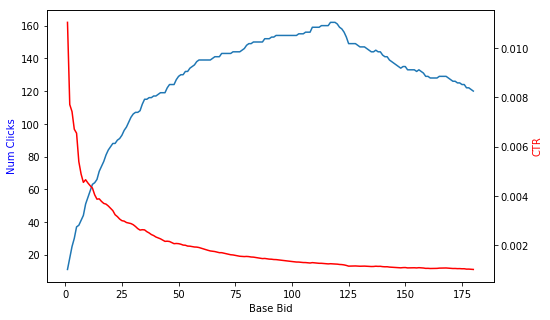

In [49]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(baseBidPrice,clicknum)
ax1.set_xlabel('Base Bid')
ax1.set_ylabel('Num Clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(baseBidPrice, ctr_p,color='r')
ax2.set_ylabel('CTR', color='r')
fig.set_size_inches(8, 5)
plt.show()

In [51]:
pCTR_test = np.array(pCTR_test)

In [75]:
optimalBaseBid = 117
bidprice_test = pbidprice(pCTR_test, optimalBaseBid)
bidprice_test = pd.DataFrame(bidprice_test)

In [76]:
res_linear = pd.concat([bidid_test, bidprice_test], axis = 1)
res_linear.columns = ['bidid', 'bidprice']
res_linear[:5]

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,190.783640
1,29167d4caa719788b5a342dbaa25151d53121f80,620.528468
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,28.620728
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,169.896974
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,109.881036


In [77]:
res_linear.to_csv('testing_bidding_price.csv')

In [78]:
df_logs.sort_values(by='clicks', ascending=False)[:10]

,basebid,clicks,cpc,ctr,imp,totalcost
118,119,[162.0],[40123.1790123],[0.00124933484487],129669.0,[6499955.0]
117,118,[162.0],[39871.0246914],[0.00125394761286],129192.0,[6459106.0]
116,117,[162.0],[39540.6234568],[0.00126180999634],128387.0,[6405581.0]
119,120,[161.0],[40372.5031056],[0.00124467534074],129351.0,[6499973.0]
113,114,[160.0],[39027.7875],[0.00127021426927],125963.0,[6244446.0]
114,115,[160.0],[39362.13125],[0.00126235729445],126747.0,[6297941.0]
115,116,[160.0],[39681.63125],[0.00125455757243],127535.0,[6349061.0]
112,113,[160.0],[38681.475],[0.00127853735327],125143.0,[6189036.0]
108,109,[159.0],[37530.918239],[0.00130595482546],121750.0,[5967416.0]
109,110,[159.0],[37882.8490566],[0.00129684760002],122605.0,[6023373.0]


# Square Bidding Strategy

In [43]:
def pbidprice_square(ctr, base_bid):
    pbid = []
    for i in range(len(ctr)):
        p = base_bid * pow((ctr[i]/0.000738), 2)
        pbid.append(p)

    return pbid

In [65]:
base = 1
bidp = []
win_number = []
totalcost = []
clicknum = []
ctr_p = []
cpc_p = []

for i in range(180):
    bid_p = np.array(pbidprice_square(pCTR_val, base)) # the list of predicted price
    payprice = payprice_val
    clicks   = click_val
    
    win_num, total_cost, click_num, ctr, cpc = evaluation(bid_p, payprice, clicks)
    #print(base)
    win_number.append(win_num)
    totalcost.append(total_cost)
    clicknum.append(click_num)
    ctr_p.append(ctr)
    cpc_p.append(cpc)
    bidp.append(bid_p)
    
    base += 1 # a new base bid price

win_num 5999.0, total_cost [ 337939.], click_num [ 53.], ctr [ 0.00883481], cpc [ 6376.20754717]
win_num 9266.0, total_cost [ 530917.], click_num [ 66.], ctr [ 0.00712281], cpc [ 8044.1969697]
win_num 11462.0, total_cost [ 676785.], click_num [ 80.], ctr [ 0.00697958], cpc [ 8459.8125]
win_num 13152.0, total_cost [ 787523.], click_num [ 84.], ctr [ 0.00638686], cpc [ 9375.27380952]
win_num 14609.0, total_cost [ 883910.], click_num [ 92.], ctr [ 0.00629749], cpc [ 9607.7173913]
win_num 15927.0, total_cost [ 970958.], click_num [ 93.], ctr [ 0.00583914], cpc [ 10440.40860215]
win_num 17178.0, total_cost [ 1054104.], click_num [ 95.], ctr [ 0.00553033], cpc [ 11095.83157895]
win_num 18372.0, total_cost [ 1131665.], click_num [ 98.], ctr [ 0.0053342], cpc [ 11547.60204082]
win_num 19516.0, total_cost [ 1203915.], click_num [ 99.], ctr [ 0.00507276], cpc [ 12160.75757576]
win_num 20585.0, total_cost [ 1274708.], click_num [ 104.], ctr [ 0.00505222], cpc [ 12256.80769231]
win_num 21691.0, to

win_num 71127.0, total_cost [ 4341200.], click_num [ 147.], ctr [ 0.00206673], cpc [ 29531.97278912]
win_num 71647.0, total_cost [ 4375071.], click_num [ 147.], ctr [ 0.00205173], cpc [ 29762.3877551]
win_num 72153.0, total_cost [ 4406700.], click_num [ 147.], ctr [ 0.00203734], cpc [ 29977.55102041]
win_num 72635.0, total_cost [ 4438875.], click_num [ 149.], ctr [ 0.00205135], cpc [ 29791.10738255]
win_num 73144.0, total_cost [ 4470924.], click_num [ 149.], ctr [ 0.00203708], cpc [ 30006.20134228]
win_num 73627.0, total_cost [ 4503117.], click_num [ 149.], ctr [ 0.00202371], cpc [ 30222.26174497]
win_num 74090.0, total_cost [ 4532701.], click_num [ 149.], ctr [ 0.00201107], cpc [ 30420.81208054]
win_num 74560.0, total_cost [ 4563775.], click_num [ 149.], ctr [ 0.00199839], cpc [ 30629.36241611]
win_num 75028.0, total_cost [ 4594974.], click_num [ 149.], ctr [ 0.00198593], cpc [ 30838.75167785]
win_num 75486.0, total_cost [ 4624293.], click_num [ 149.], ctr [ 0.00197388], cpc [ 31035.5

win_num 103637.0, total_cost [ 6499977.], click_num [ 162.], ctr [ 0.00156315], cpc [ 40123.31481481]
win_num 103592.0, total_cost [ 6499977.], click_num [ 162.], ctr [ 0.00156383], cpc [ 40123.31481481]
win_num 103601.0, total_cost [ 6499989.], click_num [ 161.], ctr [ 0.00155404], cpc [ 40372.60248447]
win_num 103540.0, total_cost [ 6499916.], click_num [ 161.], ctr [ 0.00155495], cpc [ 40372.14906832]
win_num 103527.0, total_cost [ 6499952.], click_num [ 161.], ctr [ 0.00155515], cpc [ 40372.37267081]
win_num 103475.0, total_cost [ 6499948.], click_num [ 159.], ctr [ 0.0015366], cpc [ 40880.17610063]
win_num 103469.0, total_cost [ 6499964.], click_num [ 158.], ctr [ 0.00152703], cpc [ 41139.01265823]
win_num 103438.0, total_cost [ 6499992.], click_num [ 158.], ctr [ 0.00152749], cpc [ 41139.18987342]
win_num 103414.0, total_cost [ 6499957.], click_num [ 157.], ctr [ 0.00151817], cpc [ 41401.]
win_num 103408.0, total_cost [ 6499996.], click_num [ 157.], ctr [ 0.00151826], cpc [ 41401

In [79]:
#df_logs = pd.DataFrame([baseBidPrice, win_number, totalcost, clicknum, ctr_p, cpc_p], axis = 1)
df_logs_sqaure = pd.DataFrame(
    {'basebid': baseBidPrice,
     'imp': win_number,
     'totalcost': totalcost,
     'clicks' : clicknum,
     'ctr': ctr_p,
     'cpc': cpc_p
    })
df_logs_sqaure[:5]

,basebid,clicks,cpc,ctr,imp,totalcost
0,1,[53.0],[6376.20754717],[0.00883480580097],5999.0,[337939.0]
1,2,[66.0],[8044.1969697],[0.00712281459098],9266.0,[530917.0]
2,3,[80.0],[8459.8125],[0.00697958471471],11462.0,[676785.0]
3,4,[84.0],[9375.27380952],[0.00638686131387],13152.0,[787523.0]
4,5,[92.0],[9607.7173913],[0.00629748784996],14609.0,[883910.0]


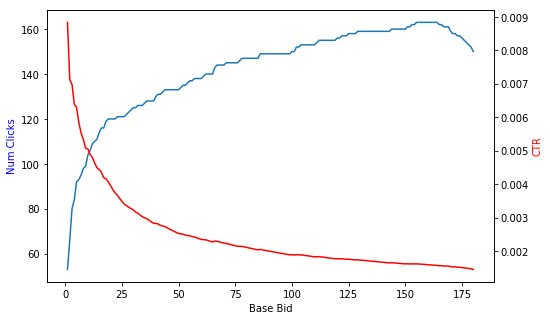

In [80]:
fig, ax1 = plt.subplots()
ax1.plot(baseBidPrice,clicknum)
ax1.set_xlabel('Base Bid')
ax1.set_ylabel('Num Clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(baseBidPrice, ctr_p,color='r')
ax2.set_ylabel('CTR', color='r')
fig.set_size_inches(8, 5)
plt.show()

In [81]:
df_logs_sqaure.sort_values(by='clicks', ascending=False)[:10]

,basebid,clicks,cpc,ctr,imp,totalcost
161,162,[163.0],[39580.4355828],[0.00158287772998],102977.0,[6451611.0]
154,155,[163.0],[38590.2515337],[0.00162019780329],100605.0,[6290211.0]
156,157,[163.0],[38901.993865],[0.00160882782581],101316.0,[6341025.0]
157,158,[163.0],[39026.0674847],[0.00160387291029],101629.0,[6361249.0]
158,159,[163.0],[39172.4785276],[0.00159836829151],101979.0,[6385114.0]
159,160,[163.0],[39324.5828221],[0.00159291689469],102328.0,[6409907.0]
160,161,[163.0],[39459.1533742],[0.00158773450741],102662.0,[6431842.0]
162,163,[163.0],[39700.4171779],[0.00157846317726],103265.0,[6471168.0]
163,164,[163.0],[39849.7300613],[0.0015731768521],103612.0,[6495506.0]
155,156,[163.0],[38750.1595092],[0.00161456476089],100956.0,[6316276.0]


In [83]:
pCTR_test = np.array(pCTR_test)

optimalBaseBid = 162
bidprice_test = pbidprice_square(pCTR_test, optimalBaseBid)
bidprice_test = pd.DataFrame(bidprice_test)

In [84]:
res_linear = pd.concat([bidid_test, bidprice_test], axis = 1)
res_linear.columns = ['bidid', 'bidprice']
res_linear[:5]

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,430.750263
1,29167d4caa719788b5a342dbaa25151d53121f80,4556.870760
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,9.694037
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,341.597417
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,142.885704


In [85]:
res_linear.to_csv('testing_bidding_price.csv')

# Exponent

In [25]:
def pbidprice_exp(ctr, base_bid):
    pbid = []
    for i in range(len(ctr)):
        p = base_bid * np.exp(ctr[i]/0.000738)
        pbid.append(p)

    return pbid

In [26]:
base = 1
bidp = []
win_number = []
totalcost = []
clicknum = []
ctr_p = []
cpc_p = []

for i in range(180):
    bid_p = np.array(pbidprice_exp(pCTR_val, base)) # the list of predicted price
    payprice = payprice_val
    clicks   = click_val
    
    win_num, total_cost, click_num, ctr, cpc = evaluation(bid_p, payprice, clicks)
    #print(base)
    win_number.append(win_num)
    totalcost.append(total_cost)
    clicknum.append(click_num)
    ctr_p.append(ctr)
    cpc_p.append(cpc)
    bidp.append(bid_p)
    
    base += 1 # a new base bid price

/Users/liuce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


win_num 12667.0, total_cost [ 875581.], click_num [ 88.], ctr [ 0.00694719], cpc [ 9949.78409091]
win_num 15860.0, total_cost [ 1045910.], click_num [ 94.], ctr [ 0.00592686], cpc [ 11126.70212766]
win_num 19247.0, total_cost [ 1181615.], click_num [ 97.], ctr [ 0.00503975], cpc [ 12181.59793814]
win_num 24167.0, total_cost [ 1306232.], click_num [ 101.], ctr [ 0.00417925], cpc [ 12932.99009901]
win_num 29309.0, total_cost [ 1427473.], click_num [ 108.], ctr [ 0.00368487], cpc [ 13217.34259259]
win_num 32771.0, total_cost [ 1538953.], click_num [ 111.], ctr [ 0.00338714], cpc [ 13864.44144144]
win_num 36523.0, total_cost [ 1666004.], click_num [ 114.], ctr [ 0.00312132], cpc [ 14614.07017544]
win_num 40467.0, total_cost [ 1791888.], click_num [ 119.], ctr [ 0.00294067], cpc [ 15057.88235294]
win_num 44688.0, total_cost [ 1923951.], click_num [ 120.], ctr [ 0.00268528], cpc [ 16032.925]
win_num 48996.0, total_cost [ 2061115.], click_num [ 123.], ctr [ 0.00251041], cpc [ 16757.03252033]


win_num 106497.0, total_cost [ 6499987.], click_num [ 74.], ctr [ 0.00069486], cpc [ 87837.66216216]
win_num 106109.0, total_cost [ 6499977.], click_num [ 72.], ctr [ 0.00067855], cpc [ 90277.45833333]
win_num 105724.0, total_cost [ 6499988.], click_num [ 72.], ctr [ 0.00068102], cpc [ 90277.61111111]
win_num 105414.0, total_cost [ 6499980.], click_num [ 72.], ctr [ 0.00068302], cpc [ 90277.5]
win_num 105109.0, total_cost [ 6499963.], click_num [ 71.], ctr [ 0.00067549], cpc [ 91548.77464789]
win_num 104776.0, total_cost [ 6499984.], click_num [ 70.], ctr [ 0.00066809], cpc [ 92856.91428571]
win_num 104438.0, total_cost [ 6499937.], click_num [ 69.], ctr [ 0.00066068], cpc [ 94201.98550725]
win_num 104134.0, total_cost [ 6499929.], click_num [ 69.], ctr [ 0.00066261], cpc [ 94201.86956522]
win_num 103816.0, total_cost [ 6499933.], click_num [ 69.], ctr [ 0.00066464], cpc [ 94201.92753623]
win_num 103487.0, total_cost [ 6499982.], click_num [ 70.], ctr [ 0.00067641], cpc [ 92856.8857142

win_num 87765.0, total_cost [ 6499925.], click_num [ 56.], ctr [ 0.00063807], cpc [ 116070.08928571]
win_num 87645.0, total_cost [ 6499814.], click_num [ 56.], ctr [ 0.00063894], cpc [ 116068.10714286]
win_num 87539.0, total_cost [ 6499936.], click_num [ 56.], ctr [ 0.00063971], cpc [ 116070.28571429]
win_num 87440.0, total_cost [ 6499917.], click_num [ 56.], ctr [ 0.00064044], cpc [ 116069.94642857]
win_num 87319.0, total_cost [ 6499885.], click_num [ 55.], ctr [ 0.00062987], cpc [ 118179.72727273]
win_num 87203.0, total_cost [ 6499995.], click_num [ 55.], ctr [ 0.00063071], cpc [ 118181.72727273]
win_num 87084.0, total_cost [ 6499943.], click_num [ 55.], ctr [ 0.00063157], cpc [ 118180.78181818]
win_num 86999.0, total_cost [ 6499919.], click_num [ 55.], ctr [ 0.00063219], cpc [ 118180.34545455]
win_num 86910.0, total_cost [ 6499993.], click_num [ 55.], ctr [ 0.00063284], cpc [ 118181.69090909]
win_num 86832.0, total_cost [ 6499922.], click_num [ 55.], ctr [ 0.00063341], cpc [ 118180.

In [29]:
#df_logs = pd.DataFrame([baseBidPrice, win_number, totalcost, clicknum, ctr_p, cpc_p], axis = 1)
df_logs_exp = pd.DataFrame(
    {'basebid': baseBidPrice,
     'imp': win_number,
     'totalcost': totalcost,
     'clicks' : clicknum,
     'ctr': ctr_p,
     'cpc': cpc_p
    })
df_logs_exp[:5]

,basebid,clicks,cpc,ctr,imp,totalcost
0,1,[88.0],[9949.78409091],[0.00694718560038],12667.0,[875581.0]
1,2,[94.0],[11126.7021277],[0.00592686002522],15860.0,[1045910.0]
2,3,[97.0],[12181.5979381],[0.00503974645399],19247.0,[1181615.0]
3,4,[101.0],[12932.990099],[0.00417925269996],24167.0,[1306232.0]
4,5,[108.0],[13217.3425926],[0.00368487495309],29309.0,[1427473.0]


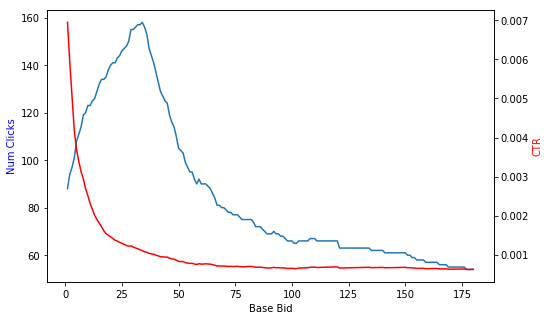

In [30]:
fig, ax1 = plt.subplots()
ax1.plot(baseBidPrice,clicknum)
ax1.set_xlabel('Base Bid')
ax1.set_ylabel('Num Clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(baseBidPrice, ctr_p,color='r')
ax2.set_ylabel('CTR', color='r')
fig.set_size_inches(8, 5)
plt.show()

In [31]:
df_logs_exp.sort_values(by='clicks', ascending=False)[:10]

,basebid,clicks,cpc,ctr,imp,totalcost
33,34,[158.0],[40120.4177215],[0.00110612499212],142841.0,[6339026.0]
32,33,[157.0],[39026.1146497],[0.00112553678068],139489.0,[6127100.0]
31,32,[157.0],[37679.4012739],[0.00115363984393],136091.0,[5915666.0]
34,35,[156.0],[41666.3653846],[0.00107561727331],145033.0,[6499953.0]
30,31,[156.0],[36688.5512821],[0.0011734175787],132945.0,[5723414.0]
29,30,[155.0],[35617.0709677],[0.00119625533491],129571.0,[5520646.0]
28,29,[155.0],[34366.8387097],[0.00122752831235],126270.0,[5326860.0]
35,36,[153.0],[42483.3202614],[0.00106470334442],143702.0,[6499948.0]
27,28,[150.0],[34270.86],[0.00121984938926],122966.0,[5140629.0]
26,27,[148.0],[33493.2297297],[0.00123736508122],119609.0,[4956998.0]


In [33]:
pCTR_test = np.array(pCTR_test)

optimalBaseBid = 34
bidprice_test = pbidprice_exp(pCTR_test, optimalBaseBid)
bidprice_test = pd.DataFrame(bidprice_test)

/Users/liuce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [34]:
res_exp = pd.concat([bidid_test, bidprice_test], axis = 1)
res_exp.columns = ['bidid', 'bidprice']
res_exp[:5]

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,173.640996
1,29167d4caa719788b5a342dbaa25151d53121f80,6836.441604
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,43.422691
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,145.252181
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,86.965777


In [35]:
res_exp.to_csv('testing_bidding_price.csv')

# ORTB

In [87]:
lambda_range = [1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1]
c_range = np.arange(1,21,1)

ortbbids = []
clambda = []

for c in c_range:
    for lambdas in lambda_range:
        clambda.append((c,lambdas))
        ortbbid = np.sqrt((c / lambdas * np.asarray(pCTR_val)) + c**2 - c)
        ortbbids.append(ortbbid.tolist())

In [90]:
len(ortbbids[0])

303925

In [92]:
import time

In [94]:
def ORTB_bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    
    bool_check = bids >= payprice_val
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += click_val[i]
                cost += payprice_val[i]
            if cost >= budget:
                break
    return impression, clicks, cost

ortb = pd.DataFrame()
ortb['C,Lambda'] = clambda

im = []
clks = []
ct = []

starttime = time.time()
print("Starting ORTB Bidding")

for bid in ortbbids:
    [imps, clicks, cost] = ORTB_bidding(bid)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    


Starting ORTB Bidding


AttributeError: 'numpy.ndarray' object has no attribute 'rint'

In [96]:
ortb['imps_won'] = im
ortb.imps_won = ortb.imps_won.astype(int)
ortb['total_spend'] = ct
ortb['clicks'] = clks
ortb['CTR'] = (ortb.clicks/ortb.imps_won)
ortb['CPM'] = (ortb.total_spend/ortb.imps_won * 1000)
ortb['CPC'] = (ortb.total_spend/ortb.clicks)

print("ORTB Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

ORTB Bidding Finished in 342.91 minutes


In [100]:
# Best ortb bid on click metric
ortb.sort_values(by='clicks', ascending=False)[:10]

,"C,Lambda",imps_won,total_spend,clicks,CTR,CPM,CPC
107,"(6, 5e-07)",147793,[6250010.0],[152],[0.00102846548889],[42288.9446726],[41118.4868421]
208,"(11, 1e-06)",144244,[5951091.0],[150],[0.00103990460608],[41257.1129475],[39673.94]
228,"(12, 1e-06)",147441,[6250032.0],[148],[0.00100379134705],[42390.0543268],[42229.9459459]
188,"(10, 1e-06)",137354,[5500673.0],[145],[0.0010556663803],[40047.4176216],[37935.6758621]
6,"(1, 1e-07)",135010,[5393039.0],[144],[0.00106658766017],[39945.4781127],[37451.6597222]
87,"(5, 5e-07)",135566,[5417778.0],[144],[0.00106221323931],[39964.1355502],[37623.4583333]
168,"(9, 1e-06)",130202,[5038312.0],[141],[0.00108293267385],[38696.1183392],[35732.7092199]
67,"(4, 5e-07)",121295,[4510136.0],[136],[0.00112123335669],[37183.1979884],[33162.7647059]
268,"(14, 1e-06)",140802,[6250003.0],[136],[0.000965895370804],[44388.5953325],[45955.9044118]
148,"(8, 1e-06)",122594,[4561365.0],[136],[0.00110935282314],[37207.0819127],[33539.4485294]


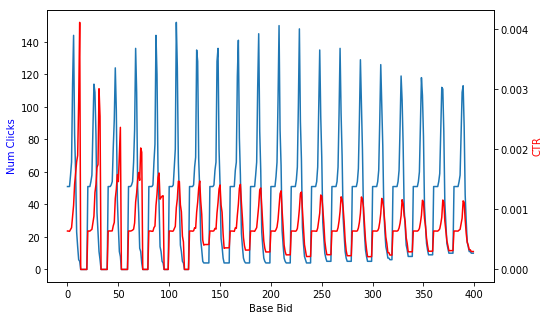

In [102]:
fig, ax1 = plt.subplots()
ax1.plot(ortb.clicks)
ax1.set_xlabel('Base Bid')
ax1.set_ylabel('Num Clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(ortb.CTR,color='r')
ax2.set_ylabel('CTR', color='r')
fig.set_size_inches(8, 5)
plt.show()

In [123]:
optiamlC = 6
optimalLambda = 5e-7
bidprice_ortb = np.sqrt((optiamlC / optimalLambda * np.asarray(pCTR_test)) + optiamlC**2 - optiamlC)

In [124]:
bidprice_ortb = pd.DataFrame(bidprice_ortb)

In [125]:
res_linear = pd.concat([bidid_test, bidprice_ortb], axis = 1)
res_linear.columns = ['bidid', 'bidprice']
res_linear[:5]

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,120.294863
1,29167d4caa719788b5a342dbaa25151d53121f80,216.793062
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,46.865435
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,113.533669
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,91.362734


In [126]:
bidprice_ortb.mean()

0    73.433768
dtype: float64

In [127]:
res_linear.to_csv('testing_bidding_price.csv')

# Gate

In [7]:
import time

In [8]:
avgCTR = 0.000738

def pbidprice_gate(ctr, norm):
    pbid = []
    for i in range(len(ctr)):
        if (ctr[i] / avgCTR) >= norm:
            pbid.append(300)
        else:
            pbid.append(0)

    return pbid

In [18]:
normRange = np.linspace(0.75,0.9,25)
bidp = []
win_number = []
totalcost = []
clicknum = []
ctr_p = []
cpc_p = []

payprice = payprice_val
clicks   = click_val

for norm in normRange:
    bid_p = np.array(pbidprice_gate(pCTR_val, norm)) # the list of predicted price

    win_num, total_cost, click_num, ctr, cpc = evaluation(bid_p, payprice, clicks)

    win_number.append(win_num)
    totalcost.append(total_cost)
    clicknum.append(click_num)
    ctr_p.append(ctr)
    cpc_p.append(cpc)
    bidp.append(bid_p)

win_num 73784.0, total_cost [ 6499983.], click_num [ 152.], ctr [ 0.00206007], cpc [ 42763.04605263]
win_num 73780.0, total_cost [ 6499911.], click_num [ 152.], ctr [ 0.00206018], cpc [ 42762.57236842]
win_num 73728.0, total_cost [ 6499956.], click_num [ 154.], ctr [ 0.00208876], cpc [ 42207.50649351]
win_num 73699.0, total_cost [ 6499991.], click_num [ 154.], ctr [ 0.00208958], cpc [ 42207.73376623]
win_num 73198.0, total_cost [ 6462547.], click_num [ 155.], ctr [ 0.00211754], cpc [ 41693.8516129]
win_num 72533.0, total_cost [ 6406340.], click_num [ 155.], ctr [ 0.00213696], cpc [ 41331.22580645]
win_num 71853.0, total_cost [ 6347518.], click_num [ 154.], ctr [ 0.00214326], cpc [ 41217.64935065]
win_num 71158.0, total_cost [ 6288478.], click_num [ 153.], ctr [ 0.00215014], cpc [ 41101.16339869]
win_num 70488.0, total_cost [ 6227990.], click_num [ 152.], ctr [ 0.0021564], cpc [ 40973.61842105]
win_num 69813.0, total_cost [ 6170718.], click_num [ 152.], ctr [ 0.00217724], cpc [ 40596.82

In [19]:
#df_logs = pd.DataFrame([baseBidPrice, win_number, totalcost, clicknum, ctr_p, cpc_p], axis = 1)
df_logs_gate = pd.DataFrame(
    {'normRange': normRange,
     'imp': win_number,
     'totalcost': totalcost,
     'clicks' : clicknum,
     'ctr': ctr_p,
     'cpc': cpc_p
    })
df_logs_gate[:5]

,clicks,cpc,ctr,imp,normRange,totalcost
0,[152.0],[42763.0460526],[0.00206006722325],73784.0,0.75000,[6499983.0]
1,[152.0],[42762.5723684],[0.00206017891027],73780.0,0.75625,[6499911.0]
2,[154.0],[42207.5064935],[0.00208875868056],73728.0,0.76250,[6499956.0]
3,[154.0],[42207.7337662],[0.00208958059132],73699.0,0.76875,[6499991.0]
4,[155.0],[41693.8516129],[0.0021175441952],73198.0,0.77500,[6462547.0]


In [20]:
df_logs_gate.sort_values(by='clicks', ascending = False)[:10]

,clicks,cpc,ctr,imp,normRange,totalcost
4,[155.0],[41693.8516129],[0.0021175441952],73198.0,0.77500,[6462547.0]
5,[155.0],[41331.2258065],[0.00213695834999],72533.0,0.78125,[6406340.0]
2,[154.0],[42207.5064935],[0.00208875868056],73728.0,0.76250,[6499956.0]
3,[154.0],[42207.7337662],[0.00208958059132],73699.0,0.76875,[6499991.0]
6,[154.0],[41217.6493506],[0.00214326472103],71853.0,0.78750,[6347518.0]
7,[153.0],[41101.1633987],[0.00215014474831],71158.0,0.79375,[6288478.0]
0,[152.0],[42763.0460526],[0.00206006722325],73784.0,0.75000,[6499983.0]
11,[152.0],[39857.9078947],[0.00221923728319],68492.0,0.81875,[6058402.0]
13,[152.0],[39198.5723684],[0.00225911448657],67283.0,0.83125,[5958183.0]
1,[152.0],[42762.5723684],[0.00206017891027],73780.0,0.75625,[6499911.0]


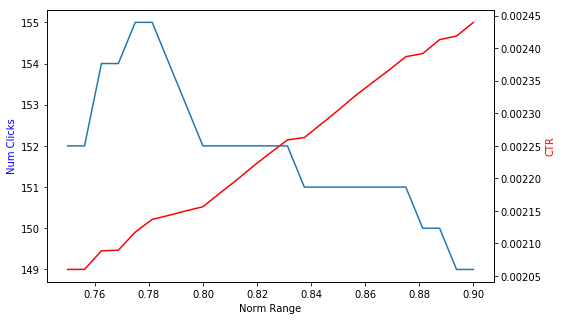

In [24]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(normRange,clicknum)
ax1.set_xlabel('Norm Range')
ax1.set_ylabel('Num Clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(normRange, ctr_p,color='r')
ax2.set_ylabel('CTR', color='r')
fig.set_size_inches(8, 5)
plt.show()

In [12]:
(pCTR_val/avgCTR).mean()

1.1941317979532655

In [36]:
bidprice_linear = pbidprice(pCTR_test, 117)

In [44]:
bidprice_square = pbidprice_square(pCTR_test, 162)

In [39]:
bidprice_exp = pbidprice_exp(pCTR_test, 34)

/Users/liuce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [38]:
optiamlC = 6
optimalLambda = 5e-7
bidprice_ortb = np.sqrt((optiamlC / optimalLambda * np.asarray(pCTR_test)) + optiamlC**2 - optiamlC)

In [40]:
bidprice_gate = pbidprice_gate(pCTR_test, 0.78125)

In [50]:
bidprice_linear = pd.DataFrame(bidprice_linear)
bidprice_square = pd.DataFrame(bidprice_square)
bidprice_exp = pd.DataFrame(bidprice_exp)
bidprice_ortb = pd.DataFrame(bidprice_ortb)
bidprice_gate = pd.DataFrame(bidprice_gate)

In [52]:
pd_combine = pd.concat([bidprice_linear, bidprice_square, bidprice_exp, bidprice_ortb, bidprice_gate], axis=1)

In [54]:
pd_combine.columns = ['linear', 'square', 'exp', 'ortb', 'gate']

In [55]:
pd_combine[:5] # 162 163 158 152 152

,linear,square,exp,ortb,gate
0,190.783640,430.750263,173.640996,120.294863,300
1,620.528468,4556.870760,6836.441604,216.793062,300
2,28.620728,9.694037,43.422691,46.865435,0
3,169.896974,341.597417,145.252181,113.533669,300
4,109.881036,142.885704,86.965777,91.362734,300


In [91]:
bidprice_combine = 0.3* pd_combine['linear'] + 0.7 * pd_combine['square']

In [92]:
res_combine = pd.concat([bidid_test, bidprice_combine], axis = 1)
res_combine.columns = ['bidid', 'bidprice']
res_combine[:5]

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,358.760276
1,29167d4caa719788b5a342dbaa25151d53121f80,3375.968073
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,15.372044
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,290.087284
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,132.984304


In [93]:
res_combine.to_csv('testing_bidding_price.csv')

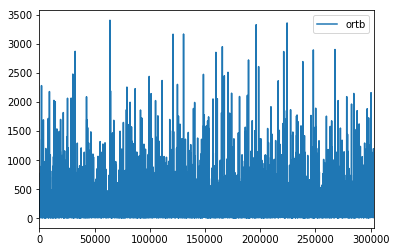

In [96]:
pd_combine[['ortb']].plot()
plt.show()

In [97]:
pd_combine['ortb'].mean()

73.43376822624542

In [98]:
pd_combine['square'].mean()

21178.346243356187

In [59]:
bidprice_linear_val = pbidprice(pCTR_val, 117)
bidprice_square_val = pbidprice_square(pCTR_val, 162)
bidprice_exp_val = pbidprice_exp(pCTR_val, 34)
bidprice_ortb_val = np.sqrt((optiamlC / optimalLambda * np.asarray(pCTR_val)) + optiamlC**2 - optiamlC)
bidprice_gate_val = pbidprice_gate(pCTR_val, 0.78125)

/Users/liuce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [60]:
bidprice_linear_val = pd.DataFrame(bidprice_linear_val)
bidprice_square_val = pd.DataFrame(bidprice_square_val)
bidprice_exp_val = pd.DataFrame(bidprice_exp_val)
bidprice_ortb_val = pd.DataFrame(bidprice_ortb_val)
bidprice_gate_val = pd.DataFrame(bidprice_gate_val)

In [61]:
combine_val = pd.concat([bidprice_linear_val, bidprice_square_val, bidprice_exp_val, bidprice_ortb_val, bidprice_gate_val], axis=1)
combine_val.columns = ['1', '2', '3', '4', '5']

In [62]:
combine_val[:5]

,1,2,3,4,5
0,31.041096,11.402955,44.330328,48.780859,0
1,17.369674,3.570480,39.441528,36.670843,0
2,12.255700,1.777541,37.754705,30.946118,0
3,22.519882,6.001717,41.216479,41.648311,0
4,19.986933,4.727544,40.333767,39.279220,0


In [63]:
combine_price = (combine_val['1'] + combine_val['2'] + combine_val['3'] + combine_val['4'] + combine_val['5'])/5
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 121380.0, total_cost [ 6324178.], click_num [ 162.], ctr [ 0.00133465], cpc [ 39038.13580247]


In [64]:
combine_price = 0.22*combine_val['1'] + 0.22*combine_val['2'] + 0.22*combine_val['3'] + 0.22*combine_val['4'] + 0.12*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 126196.0, total_cost [ 6369499.], click_num [ 162.], ctr [ 0.00128372], cpc [ 39317.89506173]


In [65]:
combine_price = 0.4*combine_val['1'] + 0.4*combine_val['2'] + 0.1*combine_val['3'] + 0.05*combine_val['4'] + 0.05*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 119481.0, total_cost [ 6459212.], click_num [ 162.], ctr [ 0.00135586], cpc [ 39871.67901235]


In [66]:
combine_price = 0.4*combine_val['1'] + 0.5*combine_val['2'] + 0.1*combine_val['3']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 118439.0, total_cost [ 6499826.], click_num [ 164.], ctr [ 0.00138468], cpc [ 39633.08536585]


In [67]:
combine_price = 0.4*combine_val['1'] + 0.6*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 113546.0, total_cost [ 6499978.], click_num [ 164.], ctr [ 0.00144435], cpc [ 39634.01219512]


In [68]:
combine_price = 0.5*combine_val['1'] + 0.5*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 116017.0, total_cost [ 6499949.], click_num [ 163.], ctr [ 0.00140497], cpc [ 39876.98773006]


In [69]:
combine_price = 0.3*combine_val['1'] + 0.7*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 110912.0, total_cost [ 6490423.], click_num [ 165.], ctr [ 0.00148767], cpc [ 39335.8969697]


In [89]:
combine_price = 0.31*combine_val['1'] + 0.69*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 111219.0, total_cost [ 6493545.], click_num [ 165.], ctr [ 0.00148356], cpc [ 39354.81818182]


In [90]:
combine_price = 0.29*combine_val['1'] + 0.71*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 110635.0, total_cost [ 6488815.], click_num [ 164.], ctr [ 0.00148235], cpc [ 39565.94512195]


In [70]:
combine_price = 0.2*combine_val['1'] + 0.8*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 108131.0, total_cost [ 6473891.], click_num [ 163.], ctr [ 0.00150743], cpc [ 39717.12269939]


In [71]:
combine_price = 0.25*combine_val['1'] + 0.75*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 109497.0, total_cost [ 6484104.], click_num [ 163.], ctr [ 0.00148863], cpc [ 39779.7791411]


In [72]:
combine_price = 0.4*combine_val['1'] + 0.8*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 110395.0, total_cost [ 6499805.], click_num [ 143.], ctr [ 0.00129535], cpc [ 45453.18181818]


In [73]:
combine_price = 0.2*combine_val['1'] + 0.6*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 96047.0, total_cost [ 5619832.], click_num [ 159.], ctr [ 0.00165544], cpc [ 35344.85534591]


In [74]:
combine_price = 0.35*combine_val['1'] + 0.75*combine_val['2']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 110810.0, total_cost [ 6499987.], click_num [ 149.], ctr [ 0.00134464], cpc [ 43624.0738255]


In [75]:
combine_price = 0.1*combine_val['1'] + 0.8*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 108098.0, total_cost [ 6437182.], click_num [ 163.], ctr [ 0.00150789], cpc [ 39491.91411043]


In [76]:
combine_price = 0.15*combine_val['1'] + 0.8*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 109739.0, total_cost [ 6499962.], click_num [ 159.], ctr [ 0.00144889], cpc [ 40880.26415094]


In [77]:
combine_price = 0.1*combine_val['1'] + 0.85*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 108556.0, total_cost [ 6499940.], click_num [ 159.], ctr [ 0.00146468], cpc [ 40880.12578616]


In [78]:
combine_price = 0.1*combine_val['1'] + 0.81*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 108665.0, total_cost [ 6477615.], click_num [ 163.], ctr [ 0.00150002], cpc [ 39739.96932515]


In [79]:
combine_price = 0.1*combine_val['1'] + 0.79*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 107554.0, total_cost [ 6397259.], click_num [ 162.], ctr [ 0.00150622], cpc [ 39489.25308642]


In [80]:
combine_price = 0.1*combine_val['1'] + 0.82*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 108869.0, total_cost [ 6499973.], click_num [ 162.], ctr [ 0.00148803], cpc [ 40123.29012346]


In [81]:
combine_price = 0.1*combine_val['1'] + 0.83*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 108714.0, total_cost [ 6499936.], click_num [ 161.], ctr [ 0.00148095], cpc [ 40372.27329193]


In [82]:
combine_price = 0.2*combine_val['1'] + 0.81*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 110243.0, total_cost [ 6499861.], click_num [ 149.], ctr [ 0.00135156], cpc [ 43623.22818792]


In [83]:
combine_price = 0.11*combine_val['1'] + 0.81*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 109144.0, total_cost [ 6499911.], click_num [ 162.], ctr [ 0.00148428], cpc [ 40122.90740741]


In [84]:
combine_price = 0.12*combine_val['1'] + 0.81*combine_val['2'] + 0.05*combine_val['3'] + 0.025*combine_val['4'] + 0.025*combine_val['5']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 109220.0, total_cost [ 6499980.], click_num [ 161.], ctr [ 0.00147409], cpc [ 40372.54658385]


In [85]:
combine_price = 0.3*combine_val['1'] + 0.7*combine_val['2'] + 0.05*combine_val['3']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 112687.0, total_cost [ 6499927.], click_num [ 158.], ctr [ 0.00140211], cpc [ 41138.77848101]


In [86]:
combine_price = 0.25*combine_val['1'] + 0.7*combine_val['2'] + 0.05*combine_val['3']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 111852.0, total_cost [ 6479314.], click_num [ 164.], ctr [ 0.00146622], cpc [ 39508.01219512]


In [87]:
combine_price = 0.28*combine_val['1'] + 0.7*combine_val['2'] + 0.02*combine_val['3']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 111331.0, total_cost [ 6486858.], click_num [ 164.], ctr [ 0.00147308], cpc [ 39554.01219512]


In [88]:
combine_price = 0.29*combine_val['1'] + 0.7*combine_val['2'] + 0.01*combine_val['3']
win_num, total_cost, click_num, ctr, cpc = evaluation(combine_price, payprice_val, click_val)

win_num 111114.0, total_cost [ 6489024.], click_num [ 164.], ctr [ 0.00147596], cpc [ 39567.2195122]
